<a href="https://colab.research.google.com/github/Ash-tensor/CMCT/blob/master/lda_custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,183 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
!pip install pyLDAvis
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 3.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=dd72f5b522d713461c7e3a448c4b3de9ef0683b71a64bd81290aa6494407e9ff
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=6a19b1a34c017050ad0ebaa1bccaacdf8f22b50be147f3f2c8a42ef35f10493b
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██████

In [ ]:
import pickle
import os
import re
import konlpy
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.sklearn
import datetime
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import openpyxl

In [ ]:
with open('/content/final_article_dict.p', 'rb') as f :
  final_article = pickle.load(f)

article_keys = list(final_article.keys())

revised_article = {}

for i in article_keys :
  a = final_article[i]
  revised_article[i] = []
  for k in a :
    revised_article[i].append(k[1])

In [ ]:
a = datetime.datetime.strptime(final_article['g1'][0][0][:10], '%Y.%m.%d')
print(a)
print(len(final_article['g1']))

2017-06-29 00:00:00
805


In [ ]:
final_article['g1'][0]

['2017.06.29. 오후 5:08',
 '【광주=뉴시스】신대희 기자 = ◇광산구 온라인창구 민원 해결 \'일등공신\'\n\n광주 광산구는 지난 1년 간 주민들이 온라인으로 접수한 민원이 3만9296건으로 집계됐다고 29일 밝혔다.\n\n이는 월 평균 3275건으로, 하루 100건이 넘는 불편 사항을 주민들이 온라인으로 알린 셈이다.\n\n불편 민원 종류를 보면 불법 주정차가 1만7204건으로 가장 많았다.\n\n이어 장애인주차구역 위반 신고 9148건, 공공시설물 파손 및 개·보수 요청 1711건, 불법광고물 신고 1424건, 쓰레기 무단 투기 신고 772건이었다.\n\n주민들은 \'광산365\', 행정자치부 \'생활불편신고\', 국민권익위원회의 \'국민신문고\'를 이용한 것으로 나타났다.\n\n특히 지난해부터 운영한 모바일, 온라인 민원 접수 창구 \'광산365\'가 전체 민원의 10%를 차지하고 있어 주민들의 활용도가 증대될 것으로 광산구는 기대하고 있다.\n\n광산구는 폭증하는 민원을 신속하게 접수하고, 처리하기 위해 시민소통팀을 지난해 7월 신설했다.\n\n온라인 민원을 통합 관리하는 시민소통팀은 접수 즉시 담당 부서에 민원을 전달하고 처리 결과를 주민에게 알려주고 있다.\n\n광산구는 생활민원 처리 요청을 접수 받는 즉시 관련법과 절차에 따라 처리할 방침이다.\n\n한편 국민권익위원회는 편리한 사용, 발 빠른 대처, 정확한 사후통지 성과를 인정해 광산구를 \'2016 고충민원 처리 평가 우수기관\'으로 지난 3월 선정했다.\n\n◇30일 광주청소년삶디자인센터서 청년 부채 관련 토크콘서트\n\n광주경제실천시민연합은 오는 30일 오후 6시30분 광주 동구 \'청소년삶디자인센터 1층 어서욥쇼홀\'에서 청년 부채와 관련된 토크콘서트를 연다고 29일 밝혔다.\n\n광주경실련과 청년유니온이 공동 주최하는 이번 토크콘서트에는 \'우리는 왜 공부할수록 가난해지는가\'의 저자 천주희 작가가 함께한다.\n\n천 작가는 청년들이 부채에 대해 갖고 있는 고민을 공유한

In [ ]:
for i in list(final_article.keys()) :
  print(len(final_article[i]))

805
812
209
788
737
838
523
659
740
750
661
65
558
535
590


In [ ]:
cut_date1 = datetime.datetime.strptime('2021.10.31','%Y.%m.%d')
cut_date2 = datetime.datetime.strptime('2022.10.31','%Y.%m.%d')

final_article_m = {}

for i in list(final_article.keys()) :
  final_article_m[i] = []
  for k in final_article[i] :
    a = datetime.datetime.strptime(k[0][:10], '%Y.%m.%d')
    if a < cut_date1 :
      pass
    elif a > cut_date2 :
      pass
    else :
      final_article_m[i].append(k)

#1년간 모은 데이터

for i in list(final_article_m.keys()) : 
  print(len(final_article_m[i]))

#1년치로 하자
 # 'g1', 'g10', 'g11', 'g12', 'g13', 'g14', 'g15', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9'

61
600
50
124
468
561
289
335
0
685
20
12
32
191
139


In [ ]:
print(final_article_m['g1'][0])

['2022.03.15. 오후 4:15', '[광주=뉴시스] 광주 서구는 공공시설 위탁 관리를 도맡는 출자 지방공기업 서구 시설관리공단이 지난 14일 서구생활환경센터에서 출범식을 열었다고 15일 밝혔다. (사진=광주 서구 제공) 2022.03.15. photo@newsis.com *재판매 및 DB 금지\n\n\n[광주=뉴시스] 변재훈 기자 = 광주 서구는 공공시설 위탁 관리를 도맡는 출자 지방공기업 서구 시설관리공단이 지난 14일 서구생활환경센터에서 출범식을 열었다고 15일 밝혔다.\n\n서구시설관리공단은 지방공기업법에 따라 지난해 10월 설립됐으며, 지난 1월 3일부터 본격적인 업무에 나섰다.\n\n공단의 조직 규모는 경영소통팀, 환경교통팀 2개 부서 175명으로 구성됐다. 생활·대형폐기물의 수집·운반, 재활용품 선별장 운영, 공영주차장(28곳)·유개승강장(256곳)에 대한 위탁 관리·운영을 전담한다.\n\n또 개관 또는 완공을 앞둔 국민체육센터와 문예회관을 비롯해 전통시장 내 공영주차장과 현수막 게시대, 체육시설 등 공공시설물의 운영권을 단계적으로 인수, 관리한다.\n\n임낙평 서구시설관리공단 이사장은 출범사를 통해 체계적이고 효율적인 시설 관리·조직 운영, 노동조합과 상생의 동반자 관계 형성을 약속하며 양질의 공공서비스 제공에 최선을 다하겠다고 밝혔다.\n\n[광주=뉴시스] 광주 서구는 구청 민원실에 민원인과 담당 공무원 간 원활한 소통을 위해 양방향 마이크를 설치해 운영한다고 15일 밝혔다. (사진=광주 서구 제공) 2022.03.15. photo@newsis.com *재판매 및 DB 금지\n\n\n◇서구청 민원실 양방향 마이크 설치\n\n광주 서구는 구청 민원실에 민원인과 담당 공무원 간 원활한 소통을 위해 양방향 마이크를 설치해 운영한다고 15일 밝혔다.\n\n코로나19 예방·확산 방지를 위해 설치한 투명 가림막과 마스크 착용으로 인한 정확한 의사소통이 어렵다는 판단에서다.\n\n이에 서구청은 예산 400여만 원을 들여 민원실 내 민원 창구에 양방향

In [ ]:
article_keys = list(final_article_m.keys())

revised_article = {}

for i in article_keys :
  a = final_article_m[i]
  revised_article[i] = []
  for k in a :
    revised_article[i].append(k[1])

In [ ]:
revised_article['g1'][0]

'[광주=뉴시스] 광주 서구는 공공시설 위탁 관리를 도맡는 출자 지방공기업 서구 시설관리공단이 지난 14일 서구생활환경센터에서 출범식을 열었다고 15일 밝혔다. (사진=광주 서구 제공) 2022.03.15. photo@newsis.com *재판매 및 DB 금지\n\n\n[광주=뉴시스] 변재훈 기자 = 광주 서구는 공공시설 위탁 관리를 도맡는 출자 지방공기업 서구 시설관리공단이 지난 14일 서구생활환경센터에서 출범식을 열었다고 15일 밝혔다.\n\n서구시설관리공단은 지방공기업법에 따라 지난해 10월 설립됐으며, 지난 1월 3일부터 본격적인 업무에 나섰다.\n\n공단의 조직 규모는 경영소통팀, 환경교통팀 2개 부서 175명으로 구성됐다. 생활·대형폐기물의 수집·운반, 재활용품 선별장 운영, 공영주차장(28곳)·유개승강장(256곳)에 대한 위탁 관리·운영을 전담한다.\n\n또 개관 또는 완공을 앞둔 국민체육센터와 문예회관을 비롯해 전통시장 내 공영주차장과 현수막 게시대, 체육시설 등 공공시설물의 운영권을 단계적으로 인수, 관리한다.\n\n임낙평 서구시설관리공단 이사장은 출범사를 통해 체계적이고 효율적인 시설 관리·조직 운영, 노동조합과 상생의 동반자 관계 형성을 약속하며 양질의 공공서비스 제공에 최선을 다하겠다고 밝혔다.\n\n[광주=뉴시스] 광주 서구는 구청 민원실에 민원인과 담당 공무원 간 원활한 소통을 위해 양방향 마이크를 설치해 운영한다고 15일 밝혔다. (사진=광주 서구 제공) 2022.03.15. photo@newsis.com *재판매 및 DB 금지\n\n\n◇서구청 민원실 양방향 마이크 설치\n\n광주 서구는 구청 민원실에 민원인과 담당 공무원 간 원활한 소통을 위해 양방향 마이크를 설치해 운영한다고 15일 밝혔다.\n\n코로나19 예방·확산 방지를 위해 설치한 투명 가림막과 마스크 착용으로 인한 정확한 의사소통이 어렵다는 판단에서다.\n\n이에 서구청은 예산 400여만 원을 들여 민원실 내 민원 창구에 양방향 마이크를 설치했다.\n\n감염병 위험을 줄

In [ ]:
len(revised_article['g1'])

61

In [ ]:
print(revised_article.keys())

dict_keys(['g1', 'g10', 'g11', 'g12', 'g13', 'g14', 'g15', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9'])


In [ ]:
##todo : revised_article a1 ~ a5, g6 ~ a10, g11 ~ g15까지 합쳐서 다시 lda 분석을 돌리기

In [ ]:
first_list = []
first_list.append(revised_article['g1'])
first_list.append(revised_article['g2'])
first_list.append(revised_article['g3'])
first_list.append(revised_article['g4'])
first_list.append(revised_article['g5'])

second_list = []
second_list.append(revised_article['g6'])
second_list.append(revised_article['g7'])
second_list.append(revised_article['g8'])
second_list.append(revised_article['g9'])
second_list.append(revised_article['g10'])

third_list = []
third_list.append(revised_article['g11'])
third_list.append(revised_article['g12'])
third_list.append(revised_article['g13'])
third_list.append(revised_article['g14'])
third_list.append(revised_article['g15'])

In [ ]:
len(first_list)

5

In [ ]:
temp_list1 = []
temp_list2 = []
temp_list3 = []

for i in first_list :
  for k in i :
    temp_list1.append(k)

for i in second_list :
  for k in i :
    temp_list2.append(k)

for i in third_list :
  for k in i :
    temp_list3.append(k)

final_revised_article = {}
final_revised_article['a1'] = temp_list1
final_revised_article['a2'] = temp_list2
final_revised_article['a3'] = temp_list3


  

In [ ]:
print(len(final_revised_article['a1']))
print(len(final_revised_article['a2']))
print(len(final_revised_article['a3']))

1101
974
1492


In [ ]:
len(final_revised_article['a1'][0])

1564

In [ ]:
final_revised_article['a1']

['[광주=뉴시스] 광주 서구는 공공시설 위탁 관리를 도맡는 출자 지방공기업 서구 시설관리공단이 지난 14일 서구생활환경센터에서 출범식을 열었다고 15일 밝혔다. (사진=광주 서구 제공) 2022.03.15. photo@newsis.com *재판매 및 DB 금지\n\n\n[광주=뉴시스] 변재훈 기자 = 광주 서구는 공공시설 위탁 관리를 도맡는 출자 지방공기업 서구 시설관리공단이 지난 14일 서구생활환경센터에서 출범식을 열었다고 15일 밝혔다.\n\n서구시설관리공단은 지방공기업법에 따라 지난해 10월 설립됐으며, 지난 1월 3일부터 본격적인 업무에 나섰다.\n\n공단의 조직 규모는 경영소통팀, 환경교통팀 2개 부서 175명으로 구성됐다. 생활·대형폐기물의 수집·운반, 재활용품 선별장 운영, 공영주차장(28곳)·유개승강장(256곳)에 대한 위탁 관리·운영을 전담한다.\n\n또 개관 또는 완공을 앞둔 국민체육센터와 문예회관을 비롯해 전통시장 내 공영주차장과 현수막 게시대, 체육시설 등 공공시설물의 운영권을 단계적으로 인수, 관리한다.\n\n임낙평 서구시설관리공단 이사장은 출범사를 통해 체계적이고 효율적인 시설 관리·조직 운영, 노동조합과 상생의 동반자 관계 형성을 약속하며 양질의 공공서비스 제공에 최선을 다하겠다고 밝혔다.\n\n[광주=뉴시스] 광주 서구는 구청 민원실에 민원인과 담당 공무원 간 원활한 소통을 위해 양방향 마이크를 설치해 운영한다고 15일 밝혔다. (사진=광주 서구 제공) 2022.03.15. photo@newsis.com *재판매 및 DB 금지\n\n\n◇서구청 민원실 양방향 마이크 설치\n\n광주 서구는 구청 민원실에 민원인과 담당 공무원 간 원활한 소통을 위해 양방향 마이크를 설치해 운영한다고 15일 밝혔다.\n\n코로나19 예방·확산 방지를 위해 설치한 투명 가림막과 마스크 착용으로 인한 정확한 의사소통이 어렵다는 판단에서다.\n\n이에 서구청은 예산 400여만 원을 들여 민원실 내 민원 창구에 양방향 마이크를 설치했다.\n\n감염병 위험을 

In [ ]:
temp_article = pd.DataFrame(final_revised_article['a1'], columns = ['text'])

In [ ]:
dataframe_list = []
new_dataframe_list = []
article_keys = list(final_revised_article.keys())


for i in article_keys :
  temp = pd.DataFrame(final_revised_article[i], columns=['text'])
  dataframe_list.append(temp)

for i in dataframe_list :
  k = i.replace({'': np.nan})
  k = i.replace(r'^\s*$', None, regex=True)
  k.dropna(how = 'any', inplace = True)
  k = k.reset_index(drop = True)
  new_dataframe_list.append(k)

In [ ]:
okt = Okt()

In [ ]:
data_word_list = []
c = 0

for i in new_dataframe_list :
  data_list = i.text.values.tolist()
  data_word = []

  for k in range(len(data_list)) :
    data_word.append(okt.nouns(data_list[k]))
    print(c)
    c = c + 1
  data_word_list.append(data_word)

In [ ]:
print(len(data_word_list))

3


In [ ]:
data_word_list[0]

In [ ]:
final_data_word = []

for i in data_word_list :
  data_word_a = []
  for k in i :
    for c in k :
      data_word_a.append(c)
  final_data_word.append(data_word_a)


In [ ]:
len(final_data_word)

3

In [ ]:
def display_topics(model, feature_names, num_top_words):
  answer = []
  k = 0
  for topic_index, topic in enumerate(model.components_): 
        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        #첫번째 토픽의 argsort()[::-1]값 반환
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:num_top_words]

        frequancy_list = []
        for i in top_indexes : 
          frequancy_list.append(topic[i])
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])    
        answer.append(feature_concat)    
        answer.append(frequancy_list)
  return answer

In [ ]:
count_vectorizer = CountVectorizer(max_df = 0.1, max_features = 1000, min_df = 2, ngram_range = (1,2))

In [ ]:
c = 200
for i in final_data_word :
  count_vectorizer = CountVectorizer(max_df = 0.1, max_features = 1000, min_df = 2, ngram_range = (1,2))
  feat_vect = count_vectorizer.fit_transform(i)
  lda = LatentDirichletAllocation(n_components= 4)
  lda.fit(feat_vect)
  pyLDAvis.enable_notebook()
  vis = pyLDAvis.sklearn.prepare(lda, feat_vect, count_vectorizer)
  pyLDAvis.save_html(vis, '/content/drive/MyDrive/cmct/' + str(c) + '.html')
  c = c + 1

  feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word를 10개만 추출
  topic_name = display_topics(lda, feature_names, 30)

  with open('/content/drive/MyDrive/cmct/topicname/' + str(c) + '.p', 'wb') as f :
    pickle.dump(topic_name, f)





/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [ ]:
with open('/content/drive/MyDrive/cmct/topicname/203.p', 'rb') as f :
  a = pickle.load(f)

In [ ]:
def topic_name_to_df(path) :

  with open(path, 'rb') as f :
    a = pickle.load(f)

  elements = []

  i = 0
  while i < len(a) :
    #elements : 문자열의 원소 
    elements.append(a[i])
    i = i + 2

  i = 0

  while i < len(elements) :
    temp = elements[i].split(' ')
    elements[i] = temp
    i = i + 1

  i = 0

  final_elements = []
  while i < len(a) :
  #짝수인 경우에는 
    if i % 2 == 0 :
      final_elements.append(elements[int(i/2)])
      i = i + 1
    else :
      final_elements.append(a[i])
      i = i + 1

  a_df = pd.DataFrame([x for x in zip(final_elements[0],final_elements[1])], columns=['단어', '빈도'])
  a_df['topic'] = 'topic1'
  b_df = pd.DataFrame([x for x in zip(final_elements[2],final_elements[3])], columns=['단어', '빈도'])
  b_df['topic'] = 'topic2'
  c_df = pd.DataFrame([x for x in zip(final_elements[4],final_elements[5])], columns=['단어', '빈도'])
  c_df['topic'] = 'topic3'
  d_df = pd.DataFrame([x for x in zip(final_elements[6],final_elements[7])], columns=['단어', '빈도'])
  d_df['topic'] = 'topic4'

  result_df = pd.concat([a_df, b_df, c_df, d_df], ignore_index = True)

  return result_df

In [ ]:
result_df = topic_name_to_df('/content/drive/MyDrive/cmct/topicname/202.p')
print(result_df)

In [ ]:
result_df_1 = topic_name_to_df('/content/drive/MyDrive/cmct/topicname/201.p')
result_df_2 = topic_name_to_df('/content/drive/MyDrive/cmct/topicname/202.p')
result_df_3 = topic_name_to_df('/content/drive/MyDrive/cmct/topicname/203.p')

In [ ]:
result_df_1['키워드'] = '소통'
result_df_2['키워드'] = '공유가치'
result_df_3['키워드'] = '사회적 가치'

In [ ]:
result_df_1.head()

단어           빈도   topic 키워드
0   사업  4081.249237  topic1  소통
1   구독  3601.249237  topic1  소통
2  대통령  2536.249237  topic1  소통
3   계획  2241.249237  topic1  소통
4   추진  2114.249237  topic1  소통

In [ ]:
quadraple_result_df = pd.concat([result_df_1, result_df_2, result_df_3], ignore_index = True)
print(quadraple_result_df)

      단어           빈도   topic     키워드
0     사업  4081.249237  topic1      소통
1     구독  3601.249237  topic1      소통
2    대통령  2536.249237  topic1      소통
3     계획  2241.249237  topic1      소통
4     추진  2114.249237  topic1      소통
..   ...          ...     ...     ...
355   진행  1485.249221  topic4  사회적 가치
356   중심  1456.249221  topic4  사회적 가치
357   국회  1439.249221  topic4  사회적 가치
358   분야  1393.249221  topic4  사회적 가치
359   규모  1384.249221  topic4  사회적 가치

[360 rows x 4 columns]


In [ ]:
import csv

quadraple_result_df.to_csv('/content/drive/MyDrive/cmct/quadraple_result_df.csv')
quadraple_result_df.to_excel('//content/drive/MyDrive/cmct/quadraple_result_df.xlsx')

In [ ]:
quadraple_result_df['키워드']

#과정

In [ ]:
elements = []

i = 0
while i < len(a) :
  elements.append(a[i])
  i = i + 2
print(elements)

['정부 기사 지금 가치 대한 공공기관 국가 지난 평가 서비스 서울 기관 관리 개발 사람 자산 분석 분류 바로가기 위기 공감 올해 응원 활용 가장 일자리 제도 부산 에너지 소득', '언론사 국민 기업 뉴스 지역 정책 문제 대표 경영 정보 후보 운영 세계 해당 전환 제공 민주당 윤석열 상황 이번 대상 배포 교육 편집 대한민국 페이지 섹션 이동해 협력 개선', '사회 지원 구독 우리 바로 산업 통해 혁신 시장 선정 계획 주택 금융 청년 정치 문화 메인 발전 때문 코로나 디지털 링크 구축 전략 안전 공급 성과 도입 현재 대응', '경제 기자 위해 사업 대통령 한국 투자 확대 기술 추진 환경 생각 미래 관련 대해 성장 금지 재정 도시 추천 규제 후속 무단 민간 아웃 진행 중심 국회 분야 규모']


In [ ]:
i = 0

while i < len(elements) :
  temp = elements[i].split(' ')
  elements[i] = temp
  i = i + 1

print(elements)

[['정부', '기사', '지금', '가치', '대한', '공공기관', '국가', '지난', '평가', '서비스', '서울', '기관', '관리', '개발', '사람', '자산', '분석', '분류', '바로가기', '위기', '공감', '올해', '응원', '활용', '가장', '일자리', '제도', '부산', '에너지', '소득'], ['언론사', '국민', '기업', '뉴스', '지역', '정책', '문제', '대표', '경영', '정보', '후보', '운영', '세계', '해당', '전환', '제공', '민주당', '윤석열', '상황', '이번', '대상', '배포', '교육', '편집', '대한민국', '페이지', '섹션', '이동해', '협력', '개선'], ['사회', '지원', '구독', '우리', '바로', '산업', '통해', '혁신', '시장', '선정', '계획', '주택', '금융', '청년', '정치', '문화', '메인', '발전', '때문', '코로나', '디지털', '링크', '구축', '전략', '안전', '공급', '성과', '도입', '현재', '대응'], ['경제', '기자', '위해', '사업', '대통령', '한국', '투자', '확대', '기술', '추진', '환경', '생각', '미래', '관련', '대해', '성장', '금지', '재정', '도시', '추천', '규제', '후속', '무단', '민간', '아웃', '진행', '중심', '국회', '분야', '규모']]


In [ ]:
i = 0

final_elements = []
while i < len(a) :
  #짝수인 경우에는 
  if i % 2 == 0 :
    final_elements.append(elements[int(i/2)])
    i = i + 1
  else :
    final_elements.append(a[i])
    i = i + 1

print(final_elements)

[['정부', '기사', '지금', '가치', '대한', '공공기관', '국가', '지난', '평가', '서비스', '서울', '기관', '관리', '개발', '사람', '자산', '분석', '분류', '바로가기', '위기', '공감', '올해', '응원', '활용', '가장', '일자리', '제도', '부산', '에너지', '소득'], [5901.249251353988, 3861.2492513375646, 3712.249251335118, 3174.249251326629, 3151.249251326284, 2839.249251319399, 2724.249251316552, 2403.2492513072616, 2375.249251306246, 2101.249251295763, 2064.249251294262, 2020.249251292178, 1886.2492512854585, 1852.2492512834465, 1745.2492512771792, 1704.249251274554, 1673.2492512724552, 1656.249251271243, 1560.2492512640974, 1463.2492512559827, 1399.2492512499794, 1366.2492512466372, 1304.2492512400015, 1292.2492512386398, 1288.2492512381668, 1243.2492512327608, 1242.2492512326464, 1144.2492512193996, 1144.2492512193992, 1143.2492512192669], ['언론사', '국민', '기업', '뉴스', '지역', '정책', '문제', '대표', '경영', '정보', '후보', '운영', '세계', '해당', '전환', '제공', '민주당', '윤석열', '상황', '이번', '대상', '배포', '교육', '편집', '대한민국', '페이지', '섹션', '이동해', '협력', '개선'], [7471.249134570027, 5074.249134

In [ ]:
 #pd.DataFrame([ x for x in zip(lst_A,lst_B)])

test = pd.DataFrame([x for x in zip(final_elements[0], final_elements[1])], columns=['단어', '빈도'])
test['주제'] = 'topic1'
print(test)

In [ ]:
a_df = pd.DataFrame([x for x in zip(final_elements[0],final_elements[1])], columns=['단어', '빈도'])
a_df['topic'] = 'topic1'
b_df = pd.DataFrame([x for x in zip(final_elements[2],final_elements[3])], columns=['단어', '빈도'])
b_df['topic'] = 'topic2'
c_df = pd.DataFrame([x for x in zip(final_elements[4],final_elements[5])], columns=['단어', '빈도'])
c_df['topic'] = 'topic3'
d_df = pd.DataFrame([x for x in zip(final_elements[6],final_elements[7])], columns=['단어', '빈도'])
d_df['topic'] = 'topic4'
print(a_df)
print(b_df)
print(c_df)
print(d_df)

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
result_df = pd.concat([a_df, b_df, c_df, d_df], ignore_index = True)
print(result_df)

     단어           빈도   topic
0    정부  5901.249251  topic1
1    기사  3861.249251  topic1
2    지금  3712.249251  topic1
3    가치  3174.249251  topic1
4    대한  3151.249251  topic1
..   ..          ...     ...
115  진행  1485.249221  topic4
116  중심  1456.249221  topic4
117  국회  1439.249221  topic4
118  분야  1393.249221  topic4
119  규모  1384.249221  topic4

[120 rows x 3 columns]


# 시각화

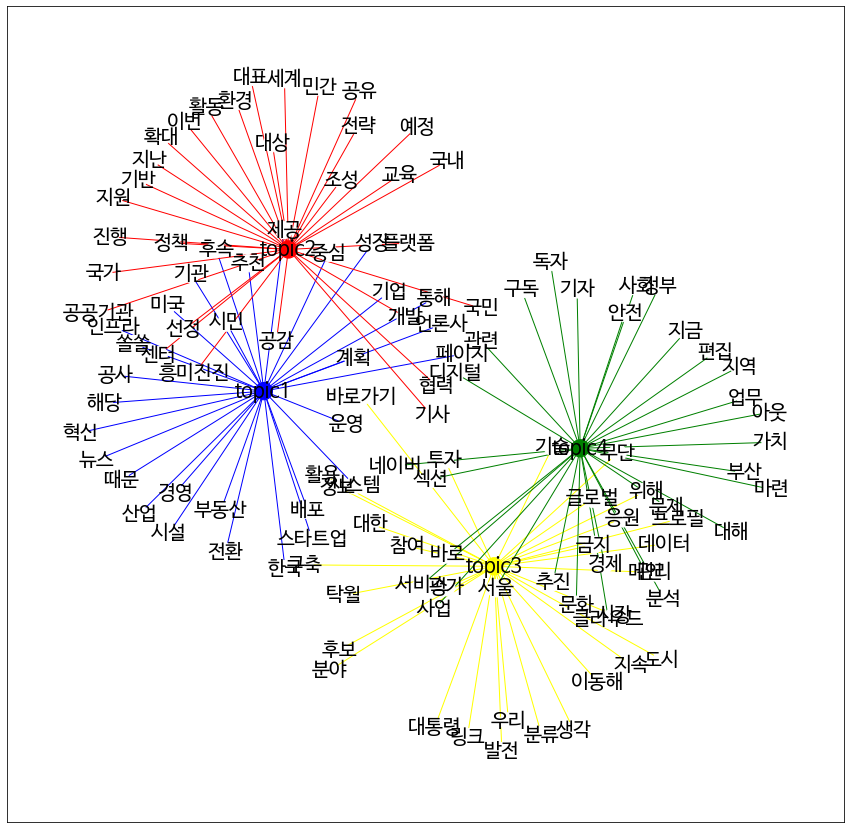

In [ ]:
#https://www.dacon.io/codeshare/4805

plt.rc('font', family='NanumBarunGothic') 

g = nx.karate_club_graph()
g = nx.from_pandas_edgelist(result_df, source = '단어', target = 'topic')
pos = nx.spring_layout(g, k = 0.1, iterations=10)

color_map_node = []
for node in g:
  if node == 'topic1':
    color_map_node.append('blue')
  elif node == 'topic2':
    color_map_node.append('red')
  elif node == 'topic3':
    color_map_node.append('yellow')
  elif node == 'topic4':
    color_map_node.append('green')
  else:
    color_map_node.append('white')

color_map_edge = []
for edges in g.edges():
    if 'topic1' in edges:
        color_map_edge.append('blue')
    if 'topic2' in edges:
        color_map_edge.append('red')
    if 'topic3' in edges:
        color_map_edge.append('yellow')
    if 'topic4' in edges:
        color_map_edge.append('green')

plt.figure(figsize=(15, 15))

nx.draw_networkx_nodes(g, pos, node_color = color_map_node)
nx.draw_networkx_edges(g, pos, width=1, edge_color = color_map_edge)
nx.draw_networkx_labels(g, pos, font_family='NanumBarunGothic', font_size=20)

plt.show()

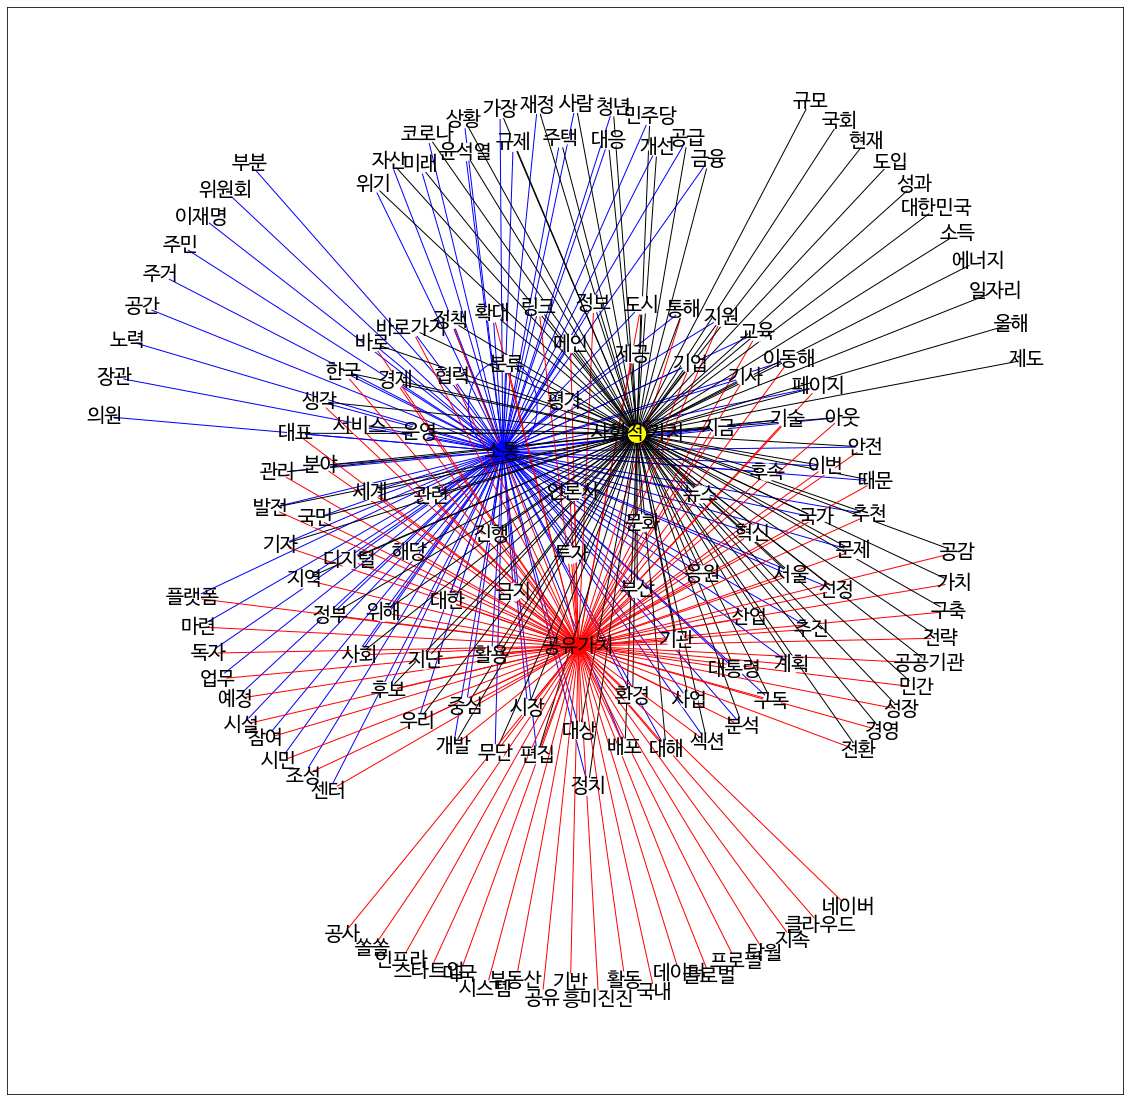

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

#result_df_1['키워드'] = '소통'
#result_df_2['키워드'] = '공유가치'
#result_df_3['키워드'] = '사회적 가치'

g = nx.Graph()
g = nx.from_pandas_edgelist(quadraple_result_df, source = '단어', target = '키워드')
pos = nx.kamada_kawai_layout(g)

color_map_node = []
for node in g:
  if node == '소통':
    color_map_node.append('blue')
  elif node == '공유가치':
    color_map_node.append('red')
  elif node == '사회적 가치':
    color_map_node.append('yellow')
  else :
    color_map_node.append('white')

color_map_edge = []
for edges in g.edges():
    if '소통' in edges:
        color_map_edge.append('blue')
    if '공유가치' in edges:
        color_map_edge.append('red')
    if '사회적 가치' in edges:
        color_map_edge.append('black')

plt.figure(figsize=(20, 20))

nx.draw_networkx_nodes(g, pos, node_color = color_map_node)
nx.draw_networkx_edges(g, pos, width=1, edge_color = color_map_edge)
nx.draw_networkx_labels(g, pos, font_family='NanumBarunGothic', font_size=20)

plt.show()

In [ ]:

elements = []

i = 0
while i < len(a) :
    #elements : 문자열의 원소 
  elements.append(a[i])
  i = i + 2

i = 0

while i < len(elements) :
  temp = elements[i].split(' ')
  elements[i] = temp
  i = i + 1

i = 0

final_elements = []
while i < len(a) :
  #짝수인 경우에는 
  if i % 2 == 0 :
    final_elements.append(elements[int(i/2)])
    i = i + 1
  else :
    final_elements.append(a[i])
    i = i + 1

a_df = pd.DataFrame([x for x in zip(final_elements[0],final_elements[1])], columns=['단어', '빈도'])
a_df['topic'] = 'topic1'
b_df = pd.DataFrame([x for x in zip(final_elements[2],final_elements[3])], columns=['단어', '빈도'])
b_df['topic'] = 'topic2'
c_df = pd.DataFrame([x for x in zip(final_elements[4],final_elements[5])], columns=['단어', '빈도'])
c_df['topic'] = 'topic3'
d_df = pd.DataFrame([x for x in zip(final_elements[6],final_elements[7])], columns=['단어', '빈도'])
d_df['topic'] = 'topic4'

result_df = pd.concat([a_df, b_df, c_df, d_df], ignore_index = True)


In [ ]:
column_list = result_df.columns
for i in column_list :
  result_df[i].replace(np.nan, '0', inplace = True)

In [ ]:
print(result_df)

          topic1 topic2 topic3      topic4
사업   4081.249237      0      0           0
구독   3601.249237      0      0           0
대통령  2536.249237      0      0           0
계획   2241.249237      0      0           0
추진   2114.249237      0      0           0
..           ...    ...    ...         ...
공급             0      0      0  981.249192
사람             0      0      0  978.249192
분석             0      0      0  933.249192
의원             0      0      0  831.249192
기관             0      0      0  827.249192

[120 rows x 4 columns]


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, feat_vect, count_vectorizer)


In [ ]:
def display_topics(model, feature_names, num_top_words):
  answer = []
  k = 0
  for topic_index, topic in enumerate(model.components_): 
        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        #첫번째 토픽의 argsort()[::-1]값 반환
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:num_top_words]

        frequancy_list = []
        for i in top_indexes : 
          frequancy_list.append(topic[i])
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])    
        answer.append(feature_concat)    
        answer.append(frequancy_list)
  return answer



# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word를 10개만 추출
display_topics(lda, feature_names, 30)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['정부 기자 위해 지금 산업 정책 확대 공공기관 국가 대표 성장 윤석열 자산 때문 배포 페이지 공감 전략 활동 센터 활용 가장 제도 미국 소득 책임 여러분 프로필 시민 공사',
 [5901.249241004079,
  4892.249240998572,
  4517.249240994738,
  3712.2492409854285,
  3369.2492409800016,
  3270.2492409782394,
  2931.2492409713145,
  2839.249240969353,
  2724.2492409664123,
  2403.2492409567867,
  1772.2492409280335,
  1726.2492409250292,
  1704.2492409235815,
  1554.249240912576,
  1554.2492409125596,
  1497.2492409077818,
  1399.249240898704,
  1357.249240894362,
  1333.2492408918158,
  1311.2492408893497,
  1292.2492408871833,
  1288.2492408866472,
  1242.2492408810795,
  1166.2492408708881,
  1143.2492408675191,
  1136.2492408664502,
  1126.2492408649266,
  1121.2492408641692,
  1116.2492408633857,
  1095.2492408600738],
 '언론사 지원 뉴스 가치 혁신 지난 선정 정보 환경 서비스 운영 금융 세계 미래 정치 개발 해당 전환 문화 대해 민주당 사람 발전 재정 분석 분류 도시 추천 후속 편집',
 [7471.249157627382,
  5159.2491576136845,
  4588.249157608771,
  3174.2491575881077,
  2733.2491575768854,
  2403.2491575661215,
  2356.249157564268